In [1]:
import numpy as np

from scipy import signal
from scipy.fft import fft, fftshift

import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib import gridspec

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits
from astropy.visualization.mpl_normalize import AsymmetricPercentileInterval
from astropy.visualization import astropy_mpl_style


import datetime

import sunpy.coordinates  # NOQA
import sunpy.map
import sunpy.data.sample
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.visualization.animator import MapSequenceAnimator
from sunpy.map import Map
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.coordinates import Helioprojective, get_body_heliographic_stonyhurst
from sunpy.time import parse_time



import aiapy.data.sample as sample_data
from aiapy.calibrate import register, update_pointing



from PIL import Image

# Defining functions to download and convert fits to maps

In [32]:
#Function to download AIA data
def Download(A):
    '''''
    A is the wavelength 
    '''''
    # giving range of time that flare occurs
    # time_range = a.Time('2013-06-13 09:20', '2013-06-13 09:55')
    time_range = a.Time('2013-06-13 09:54', '2013-06-13 10:45')

    # giving instrument and wavelength to get data in
    instrument = a.Instrument('AIA')
    #physobs = a.Physobs('LOS_magnetic_field') 
    wavelength = a.Wavelength(A * u.angstrom)

    # getting data in given wavelength and time range
    result = Fido.search(time_range, instrument, wavelength)
    #result = Fido.search(time_range, instrument, physobs)
    

    # downloading data
    downloaded_files = Fido.fetch(result)
    return downloaded_files

In [33]:
Download(304)

Files Downloaded:   2%|▏         | 5/255 [00:12<16:03,  3.85s/file]


























































































































































































































































































































































































































Files Downloaded:   2%|▏         | 6/255 [00:24<27:16,  6.57s/file]


















































































Files Downloaded:   3%|▎         | 7/255 [00:27<22:50,  5.52s/file]











































































































































Files Downloaded:   3%|▎         | 8/255 [00:37<27:56,  6.79s/file]



































































































89/0 files failed to download. Please check `.errors` for details


['/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_54_07_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_54_19_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_54_31_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_54_43_13z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_54_55_13z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_55_19_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_55_31_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_55_55_13z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_56_07_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_56_19_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data/aia_lev1_304a_2013_06_13t09_56_31_12z_image_lev1.fits', '/Users/maxrobertson/sunpy/data

In [2]:
# Function to convert from fits files to sunpy maps

# def Fits_to_maps(ang):
#     '''''
#     ang - wavelength as a string 

# '   '''''
#     # creating path to images of 171 wavelength
#     path =os.listdir('1005am_onwards_'+ang+'/')
#     #print(path_171)

#     #creating empty array to append processed images to 
#     maps = []

#     #looping over each image and turning them into maps 
#     for img in (path):
#         aia_map = sunpy.map.Map('1005am_onwards_'+ang+'/',aia_map = True)
#         maps.append(aia_map)

#     return maps

def Fits_to_maps(ang):
    """
    ang - wavelength as a string
    """
    # Creating path to images of specified wavelength
    path = os.listdir('AIA_'+ang+'_prep_rot_done')
    
    # Creating empty array to append processed maps
    maps = []

    # Looping over each image file in the directory and turning them into maps
    for img in path:
        img_path = os.path.join('AIA_'+ang+'_prep_rot_done', img)
        
        # Loading the FITS file as a SunPy map
        aia_map = sunpy.map.Map(img_path)
        
        # Check if aia_map is a list (indicating multiple HDUs) and select the first one
        # if isinstance(aia_map, list):
        #     aia_map = aia_map[0]  # Select the primary HDU if only one is needed
        
        maps.append(aia_map)
    
    return maps

In [19]:
maps_1005onwards_171 = Fits_to_maps('171')
# maps_10onwards_1700 = Fits_to_maps('1700')

In [22]:
maps_1005onwards_171 = sorted(maps_1005onwards_171,key = lambda m:m.date)
maps_1005onwards_171[0].date

<Time object: scale='utc' format='isot' value=2013-06-13T10:04:11.340>

In [13]:
submaps_171_prepped_rot = Fits_to_maps('171_')
submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)

In [4]:
maps_171 = Fits_to_maps('171')
maps_171 = sorted(maps_171,key = lambda m: m.date)

In [5]:
maps_1700 = Fits_to_maps('1700')
maps_1700 = sorted(maps_1700, key=lambda m: m.date)

# Plotting an image in each waveband

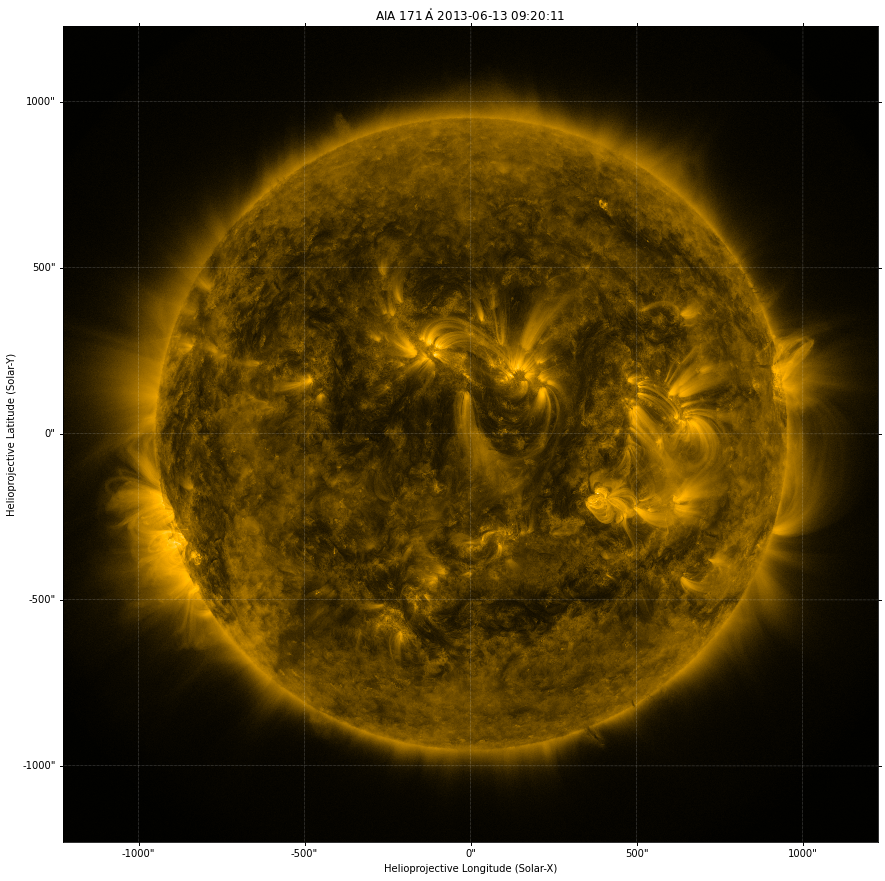

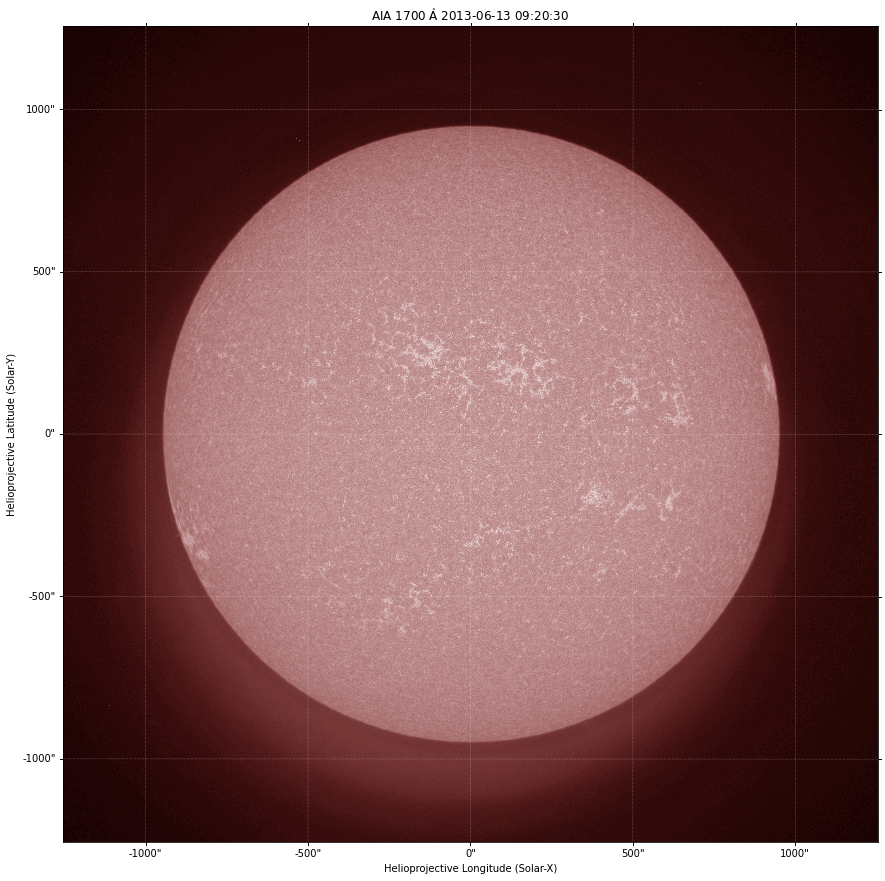

In [60]:
plt.figure(figsize=(15,15))
maps_171[0].plot()
plt.savefig(fname = '171Image',format="jpeg", bbox_inches="tight")

plt.show()

plt.figure(figsize = (15,15))
maps_1700[0].plot()
plt.show()

# plotting submaps

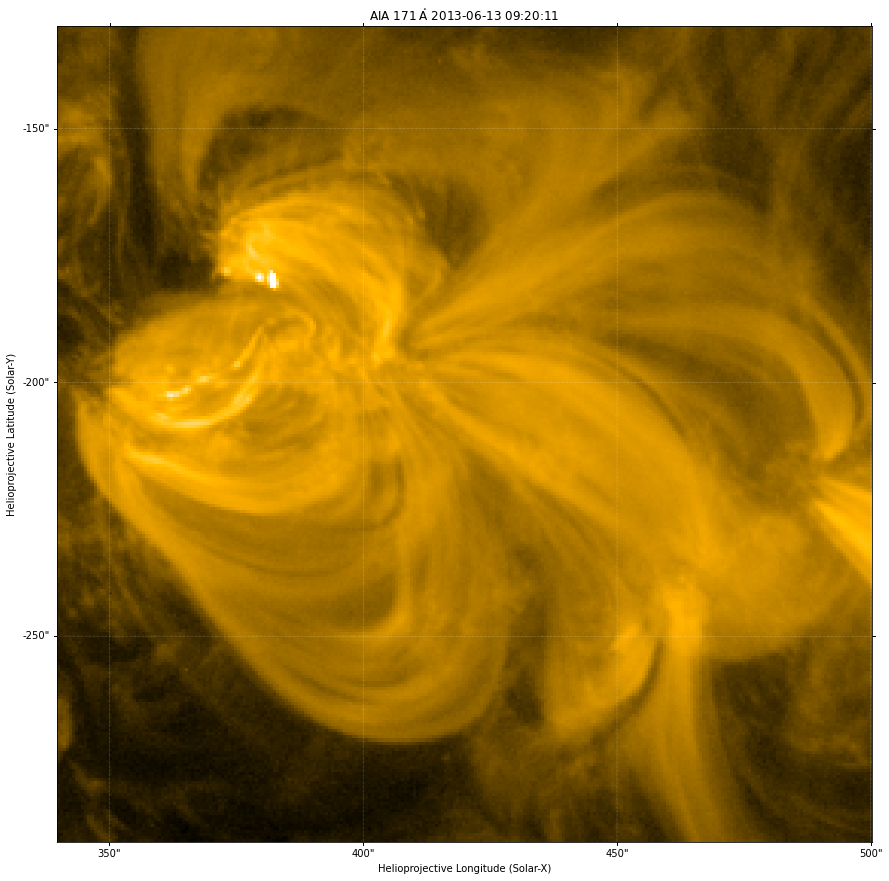

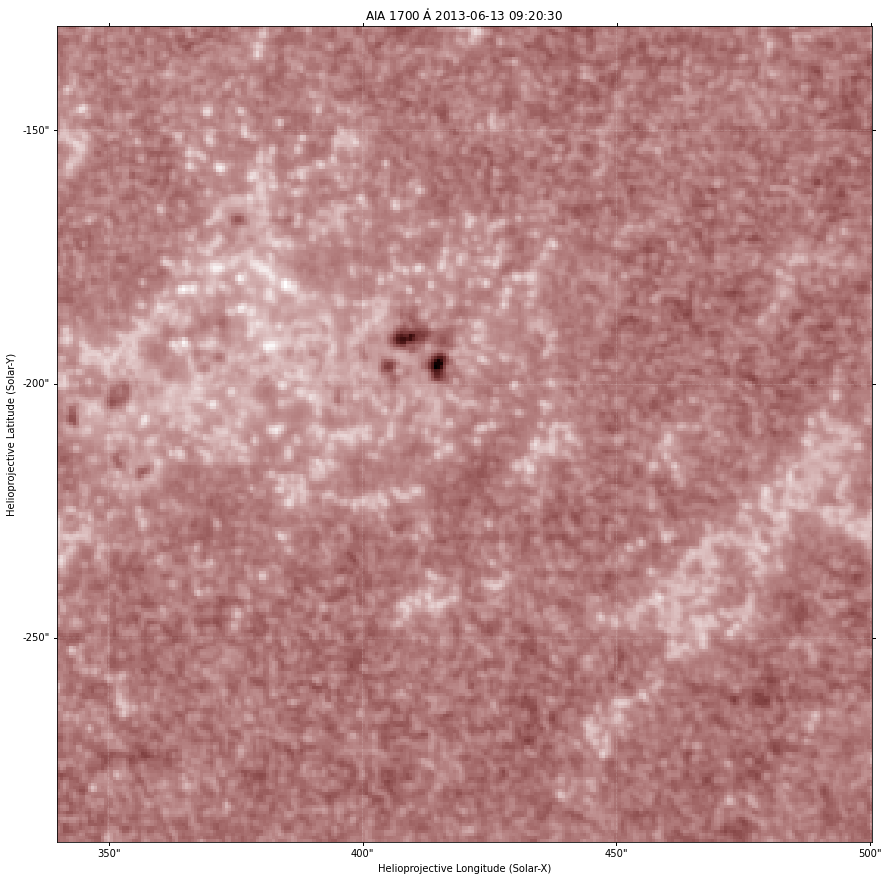

In [7]:
# creating sub maps to then prep using point and register / tried to make into square images to prep

submaps_171 = []
for i in maps_171:
    bottom_left = SkyCoord(340 * u.arcsec, -290 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(500 * u.arcsec, -130 * u.arcsec, frame=i.coordinate_frame)   
    submap_171 = i.submap(bottom_left=bottom_left, top_right=top_right)
    submaps_171.append(submap_171)

plt.figure(figsize = (15,15))
submaps_171[0].plot()
plt.show()


submaps_1700 = []
for i in maps_1700:
    bottom_left = SkyCoord(340 * u.arcsec, -290 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(500 * u.arcsec, -130 * u.arcsec, frame=i.coordinate_frame)   
    submap_1700 = i.submap(bottom_left=bottom_left, top_right=top_right)
    submaps_1700.append(submap_1700)


plt.figure(figsize = (15,15))
submaps_1700[0].plot()
plt.show()

# defining functions to point, register and d rotate

In [5]:
submaps_171_prepped_rot = Fits_to_maps('171')
# submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)

OSError: Failed to read AIA_171_prep_rot/aia_map_64.fits
[Errno 24] Too many open files
 If you want to bypass these errors, pass `allow_errors=True`.

In [11]:
#pre processed 171 images
submaps_171_prepped_rot = Fits_to_maps('171')
# submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)
# submaps_171_prepped_rot[0].date

In [12]:
submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)


In [13]:
# Function to point and register my images

def point_register(maps):
    aia_map_calibrate = []
    for i in maps[:10]:
        aia_map_updated_pointing = update_pointing(i)
        aia_map_cal = register(aia_map_updated_pointing)
        aia_map_calibrate.append(aia_map_cal)
    return aia_map_calibrate

In [14]:
def d_rot(maps):
    map = []
    for i in maps[:10]:
        maps_cal = sunpy.physics.differential_rotation.differential_rotate(i,time = submaps_171_prepped_rot[0].date)
        map.append(maps_cal)

    return map

In [ ]:
#trying to prep submaps
maps_1700_prepped = point_register(submaps_1700)
maps_171_prepped = point_register(submaps_171)

In [11]:
#need to prep data first

maps_1700_prepped = point_register(maps_1700)
maps_171_prepped = point_register(maps_171)

In [ ]:
#ready to prep

maps_1700_10 = Fits_to_maps('1700')
maps_1700_10_onwards = point_register(maps_1700_10onwards)
maps_1700_10_onwards_prep = d_rot(maps_1700_10_onwards)

In [ ]:
maps_1700_prepped_rot = d_rot(maps_1700_prepped)

In [ ]:
maps_171_prepped_rot = d_rot(maps_171_prepped)

In [24]:
maps_171_10onwards = point_register(maps_1005onwards_171 )
# maps_171_1005_prep_rot = d_rot(maps_171_10onwards)

#this will be everything in the 1005am folder pointed registered and d_rotated need to make into a submap and save 
#to the flder AIA_171_prep_rot and zip over the correct numbers 

In [13]:
maps_1700_prepped[0].date - maps_171_prepped[0].date
len(maps_1700_prepped)

77

In [14]:
closest = None
min_time_dif = None

for i in np.arange(0,len(maps_171_prepped)):
    for j in np.arange(0,len(maps_1700_prepped)):

        time_171 = maps_171_prepped[i].date
        time_1700 = maps_1700_prepped[j].date

        time_dif = abs(time_171-time_1700)

        if min_time_dif is None or time_dif < min_time_dif: 
            min_time_dif = time_dif
            closest = (i,j)



print(closest)
print(min_time_dif)

(42, 17)
5.3240740740700954e-05


In [15]:
print(maps_1700_prepped[17].date,maps_171_prepped[42].date)

2013-06-13T09:28:30.740 2013-06-13T09:28:35.340


# Creating submaps of prepped data

In [25]:
# submaps_171_prepped_rot = []
# for i in maps_171_prepped_rot:
#     bottom_left = SkyCoord(340 * u.arcsec, -275 * u.arcsec, frame=i.coordinate_frame)
#     top_right = SkyCoord(500 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)   
#     submap_171 = i.submap(bottom_left=bottom_left, top_right=top_right)
#     submaps_171_prepped_rot.append(submap_171)

# submaps_1700_prepped_rot = []
# for i in maps_1700_prepped_rot:
#     bottom_left = SkyCoord(340 * u.arcsec, -275 * u.arcsec, frame=i.coordinate_frame)
#     top_right = SkyCoord(500 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)   
#     submap_1700 = i.submap(bottom_left=bottom_left, top_right=top_right)
#     submaps_1700_prepped_rot.append(submap_1700)

submaps_171_10onwards_prep = []
for i in maps_171_10onwards :
    bottom_left = SkyCoord(340 * u.arcsec, -275 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(500 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)   
    submap_1700 = i.submap(bottom_left=bottom_left, top_right=top_right)
    submaps_171_10onwards_prep.append(submap_1700)

In [26]:
submaps_171_10onwards_prep = d_rot(submaps_171_10onwards_prep)

In [27]:
submaps_171_10onwards_prep[0].date

<Time object: scale='utc' format='isot' value=2013-06-13T09:20:11.340>

# creating animation to see if images are calibtared

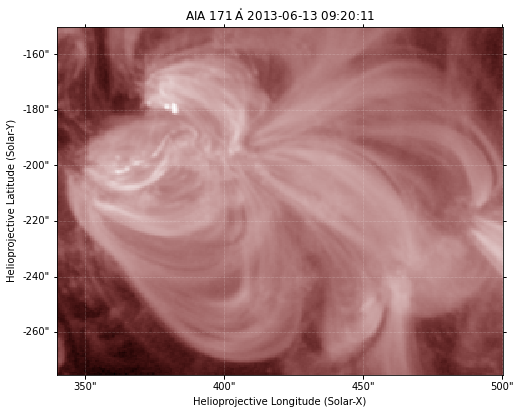

MovieWriter imagemagick unavailable; using Pillow instead.


In [67]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_171_prepped_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_171_prepped_rot[0].plot(cmap = 'sdoaia1700',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_171_prepped_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_171_prepped_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_171.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

# plotting two closest images

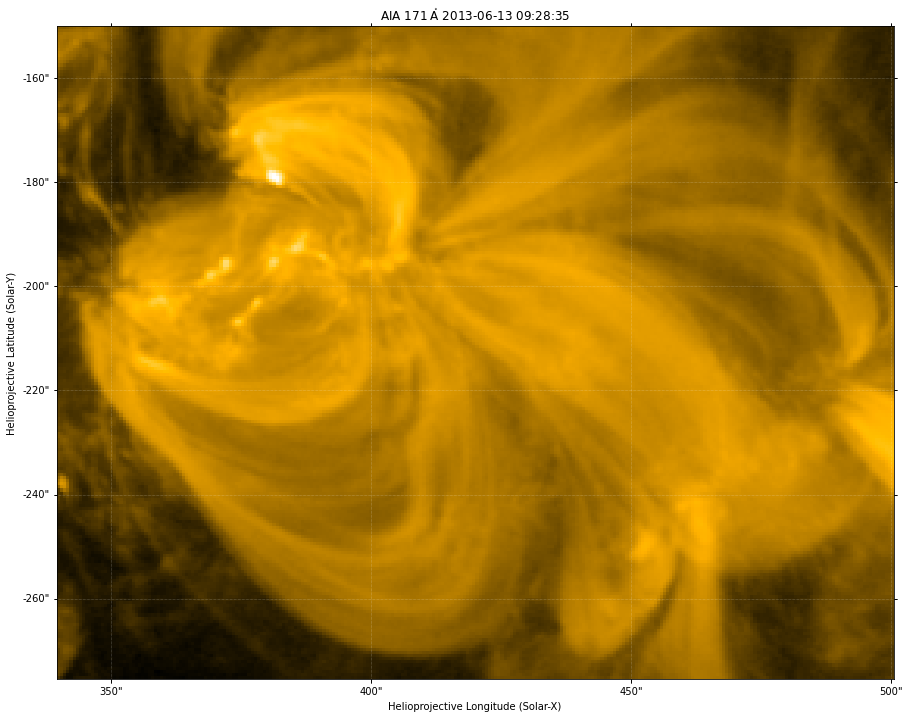

In [17]:
plt.figure(figsize = (15,15))
submaps_171_prepped_rot[42].plot()
plt.savefig(fname = '171Image_Cropped.jpeg',format="jpeg", bbox_inches="tight")

plt.show()

# plt.figure(figsize = (15,15))
# submaps_1700_prepped_rot[17].plot()
# plt.show()

# saving prepped and rotated images so i dont need to run long cell everytime

In [69]:
for i, aia_map in enumerate(submaps_1700_prepped_rot):
    aia_map.save(f'AIA_1700_prep_rot/aia_map_{i}.fits', filetype='fits')


In [71]:
for i, aia_map in enumerate(submaps_171_prepped_rot):
    aia_map.save(f'AIA_171_prep_rot/aia_map_{i}.fits', filetype='fits')

In [98]:
for i, aia_map in enumerate(submaps_171_10onwards_prep):
    aia_map.save(f'AIA_171_prep_rot_10onwards/aia_map_{i}.fits', filetype='fits')

In [7]:
def Fits_to_maps(ang):
    """
    ang - wavelength as a string
    """
    # Creating path to images of specified wavelength
    path = os.listdir('AIA_' + ang + '_prep_rot/')
    
    # Creating empty array to append processed maps
    maps = []

    # Looping over each image file in the directory and turning them into maps
    for img in path:
        img_path = os.path.join('AIA_' + ang + '_prep_rot/', img)
        
        # Loading the FITS file as a SunPy map
        aia_map = sunpy.map.Map(img_path)
        
        # Check if aia_map is a list (indicating multiple HDUs) and select the first one
        if isinstance(aia_map, list):
            aia_map = aia_map[0]  # Select the primary HDU if only one is needed
        
        maps.append(aia_map)
    
    return maps

# loading in prepped data

In [22]:
submaps_1700_prepped_rot = Fits_to_maps('1700')
submaps_1700_prepped_rot = sorted(submaps_1700_prepped_rot,key = lambda m:m.date)



 SunPy Map
 ---------
 Observatory:		 SDO
 Instrument:		 AIA 3
 Detector:		 AIA
 Measurement:		 1700.0 Angstrom
 Wavelength:		 1700.0 Angstrom
 Observation Date:	 2013-06-13 09:20:30
 Exposure Time:		 1.000035 s
 Dimension:		 [268. 209.] pix
 Coordinate System:	 helioprojective
 Scale:			 [0.6 0.6] arcsec / pix
 Reference Pixel:	 [-566.5  458.5] pix
 Reference Coord:	 [0. 0.] arcsec                   
 array([[ 827.73141332, 1007.51204137,  962.52013581, ...,  927.78219816,
          857.04890998,  837.53781846],
        [ 977.46905282, 1054.96698475, 1061.9707879 , ...,  937.47312795,
         1036.57046441, 1197.31721286],
        [ 918.38537792,  902.83742474,  924.7191087 , ...,  952.17412916,
         1201.40609466, 1572.73342802],
        ...,
        [1844.80361187, 1935.51006643, 2073.14993107, ...,  753.17936606,
          638.7662825 ,  603.77951389],
        [1763.06826816, 2208.30193462, 2389.60864101, ...,  737.55792647,
          639.42006769,  564.77163748],
        [148

[datetime.datetime(2013, 6, 13, 9, 20, 30, 710000), datetime.datetime(2013, 6, 13, 9, 20, 54, 720000), datetime.datetime(2013, 6, 13, 9, 21, 42, 710000), datetime.datetime(2013, 6, 13, 9, 22, 6, 720000), datetime.datetime(2013, 6, 13, 9, 22, 30, 730000), datetime.datetime(2013, 6, 13, 9, 22, 54, 710000), datetime.datetime(2013, 6, 13, 9, 23, 18, 710000), datetime.datetime(2013, 6, 13, 9, 23, 42, 710000), datetime.datetime(2013, 6, 13, 9, 24, 54, 710000), datetime.datetime(2013, 6, 13, 9, 25, 18, 710000), datetime.datetime(2013, 6, 13, 9, 25, 42, 710000), datetime.datetime(2013, 6, 13, 9, 26, 6, 710000), datetime.datetime(2013, 6, 13, 9, 26, 30, 710000), datetime.datetime(2013, 6, 13, 9, 26, 54, 710000), datetime.datetime(2013, 6, 13, 9, 27, 18, 710000), datetime.datetime(2013, 6, 13, 9, 27, 42, 710000), datetime.datetime(2013, 6, 13, 9, 28, 6, 710000), datetime.datetime(2013, 6, 13, 9, 28, 30, 740000), datetime.datetime(2013, 6, 13, 9, 29, 18, 710000), datetime.datetime(2013, 6, 13, 9,

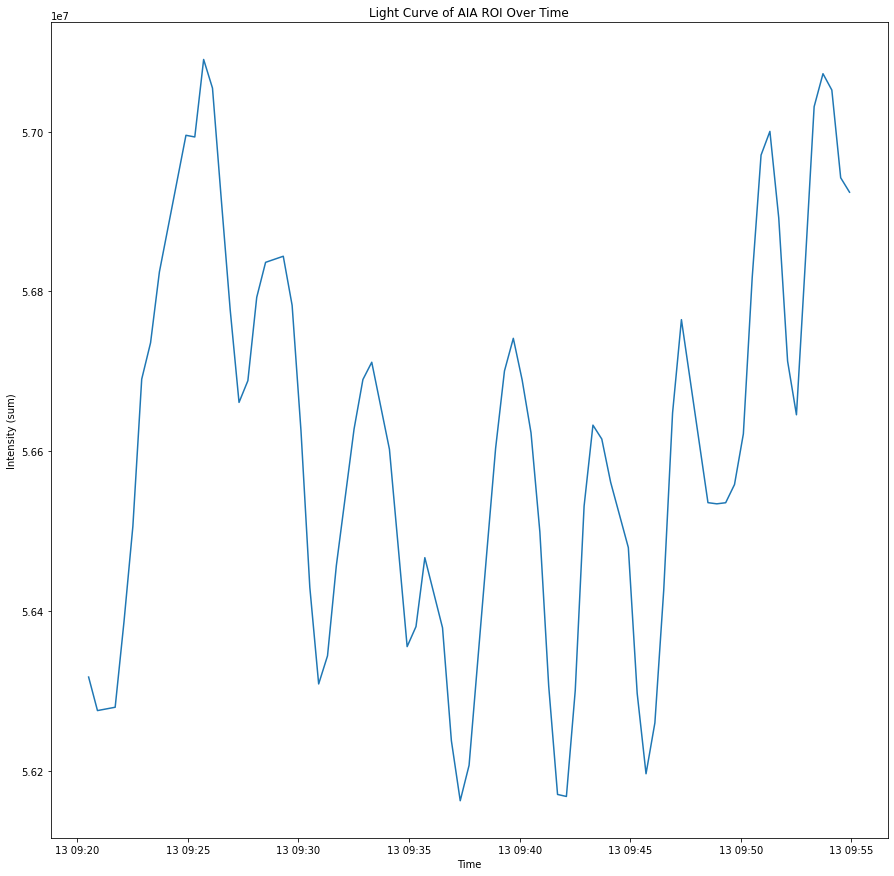

In [ ]:
intensity_1700 = []

# summing intenisty of every pixel in the 171 images to see how the intensity changes during time interval
for map in submaps_1700_prepped_rot:
    intensity_sum = map.data.sum()
    intensity_1700.append(intensity_sum)
# creating time axes of submaps
time_axis = [map.date.datetime for map in submaps_1700_prepped_rot]
print(time_axis)

plt.figure(figsize=(15,15))
plt.plot(time_axis, intensity_1700)
plt.xlabel("Time")
plt.ylabel("Intensity (sum)")
plt.title("Light Curve of AIA ROI Over Time")
plt.show()

In [8]:
submaps_171_prepped_rot = Fits_to_maps('171')
submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)
# submaps_171_prepped_rot[0].date

In [9]:
# submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)
print(type(submaps_171_prepped_rot[0]))

<class 'list'>


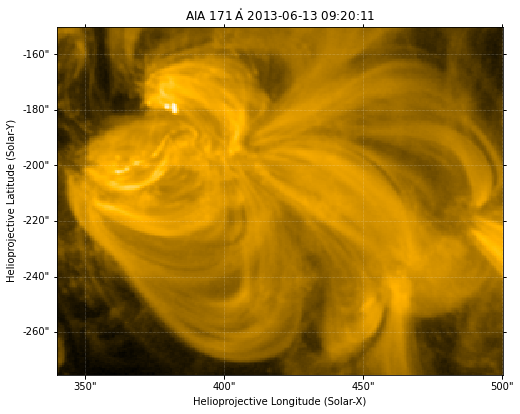

MovieWriter imagemagick unavailable; using Pillow instead.


In [120]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_171_prepped_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_171_prepped_rot[0].plot(cmap = 'sdoaia171',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_171_prepped_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_171_prepped_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_171_final.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

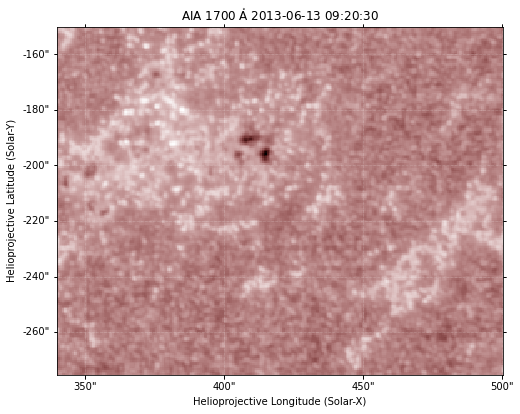

MovieWriter imagemagick unavailable; using Pillow instead.


In [110]:
#attempting to get an animation using funcanimation function

#creating a figure and a keyword arguement for the axes: world coordinate system from my first image
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': submaps_1700_prepped_rot[0].wcs})

# plotting the first image on the axes i just created, 
im = submaps_1700_prepped_rot[0].plot(cmap = 'sdoaia1700',axes=ax)

# function to update the image and title for each frame of the animation
def update(i):
    ax.images[0].set_array(submaps_1700_prepped_rot[i].data)  # updating the image in my animation to be my image
    ax.set_title(f"Frame {i + 1}")  # updating the title

#animation function, takes figure where it will be displayed, the function to update the animation, the amount of frames, sets interval in milliseconds,and loop.
anim = FuncAnimation(fig, update, frames=len(submaps_1700_prepped_rot), interval=200, repeat=True)
plt.show()



#set name of file and method for saving file
anim.save('solar_flare_animation_prep_rot_1700_final.gif', writer='imagemagick')

#had to set it equal to anim as when not the the fit was deleting before rendering

In [123]:
print(submaps_171_prepped_rot[210])

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2013-06-13 10:03:23
Exposure Time:		 2.000188 s
Dimension:		 [268. 209.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [-566.5  458.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[354.21481146, 375.77723858, 342.96669023, ..., 256.15800573,
        261.36025298, 258.98148347],
       [318.37156363, 383.69051206, 357.20218017, ..., 256.69344276,
        259.07200509, 262.39776751],
       [357.19581654, 355.22739392, 323.91268443, ..., 252.85176747,
        244.98395221, 228.07201113],
       ...,
       [405.20037343, 513.89853004, 603.39653712, ..., 296.94443295,
        288.74712612, 263.4206738 ],
       [427.95363321, 539.59161571, 624.97407314, ..., 309.76756499,
        286.07200525, 273.1839441 ],
       [457.85629822, 545.21204277, 611.17737582, ..., 325.68332579,


# attempting power spectrum analysis

171 cadnece is 12s 

1700 cadence is 24s

In [18]:
prepped_171_data = submaps_171_prepped_rot[42].data
prepped_1700_data = submaps_1700_prepped_rot[17].data

[datetime.datetime(2013, 6, 13, 9, 20, 11, 340000), datetime.datetime(2013, 6, 13, 9, 20, 23, 340000), datetime.datetime(2013, 6, 13, 9, 20, 35, 340000), datetime.datetime(2013, 6, 13, 9, 20, 47, 340000), datetime.datetime(2013, 6, 13, 9, 20, 59, 340000), datetime.datetime(2013, 6, 13, 9, 21, 11, 340000), datetime.datetime(2013, 6, 13, 9, 21, 23, 340000), datetime.datetime(2013, 6, 13, 9, 21, 35, 340000), datetime.datetime(2013, 6, 13, 9, 21, 47, 340000), datetime.datetime(2013, 6, 13, 9, 21, 59, 340000), datetime.datetime(2013, 6, 13, 9, 22, 11, 340000), datetime.datetime(2013, 6, 13, 9, 22, 23, 340000), datetime.datetime(2013, 6, 13, 9, 22, 35, 340000), datetime.datetime(2013, 6, 13, 9, 22, 47, 340000), datetime.datetime(2013, 6, 13, 9, 22, 59, 340000), datetime.datetime(2013, 6, 13, 9, 23, 11, 340000), datetime.datetime(2013, 6, 13, 9, 23, 23, 340000), datetime.datetime(2013, 6, 13, 9, 23, 35, 340000), datetime.datetime(2013, 6, 13, 9, 23, 47, 340000), datetime.datetime(2013, 6, 13,

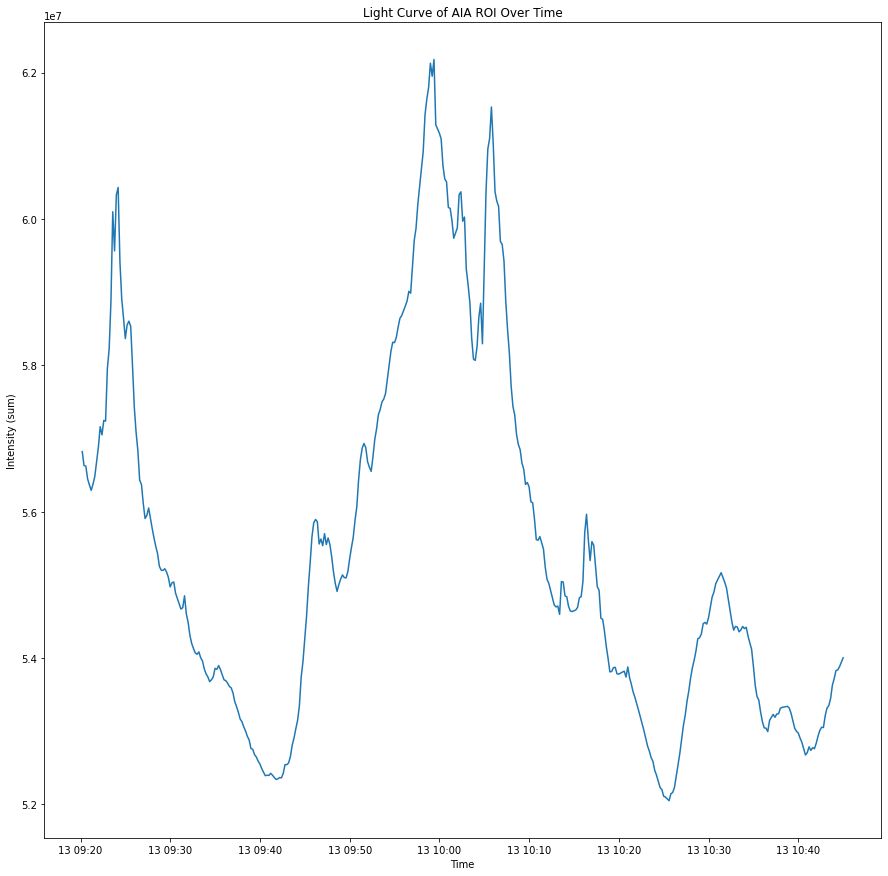

In [10]:
intensity_171 = []

# summing intenisty of every pixel in the 171 images to see how the intensity changes during time interval
for map in submaps_171_prepped_rot:
    intensity_sum = map.data.sum()
    intensity_171.append(intensity_sum)


# creating time axes of submaps
time_axis = [map.date.datetime for map in submaps_171_prepped_rot]
print(time_axis)


plt.figure(figsize=(15,15))
plt.plot(time_axis, intensity_171)
plt.xlabel("Time")
plt.ylabel("Intensity (sum)")
plt.title("Light Curve of AIA ROI Over Time")
plt.savefig(fname = '1700_lightcurve_better.jpeg',format="jpeg", bbox_inches="tight")

plt.show()

In [11]:
intensity_171_cal = []
for i in intensity_171:
    intensity = (i-np.mean(intensity_171))/np.std(intensity_171)
    intensity_171_cal.append(intensity)
intenisty_171_cal = np.ma.masked_less(intensity_171_cal, 0)

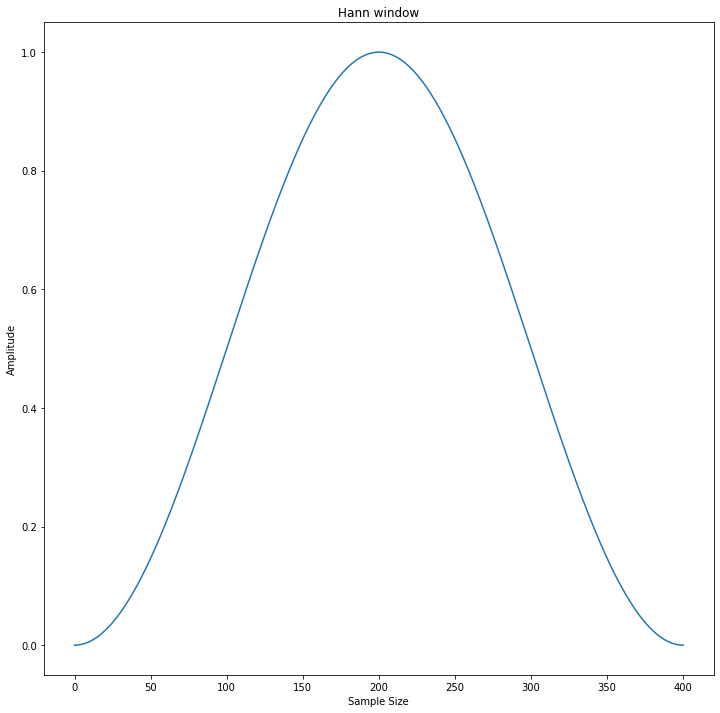

In [12]:
window = signal.windows.hann(len(intensity_171_cal))
plt.figure(figsize=(12,12))
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample Size")
plt.savefig(fname = 'window.jpeg',format="jpeg", bbox_inches="tight")
plt.show()

/var/folders/96/6cy2m0cs6f58g_nf35j6n89c0000gn/T/ipykernel_11594/2112440611.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/(freqs),(fft_171))


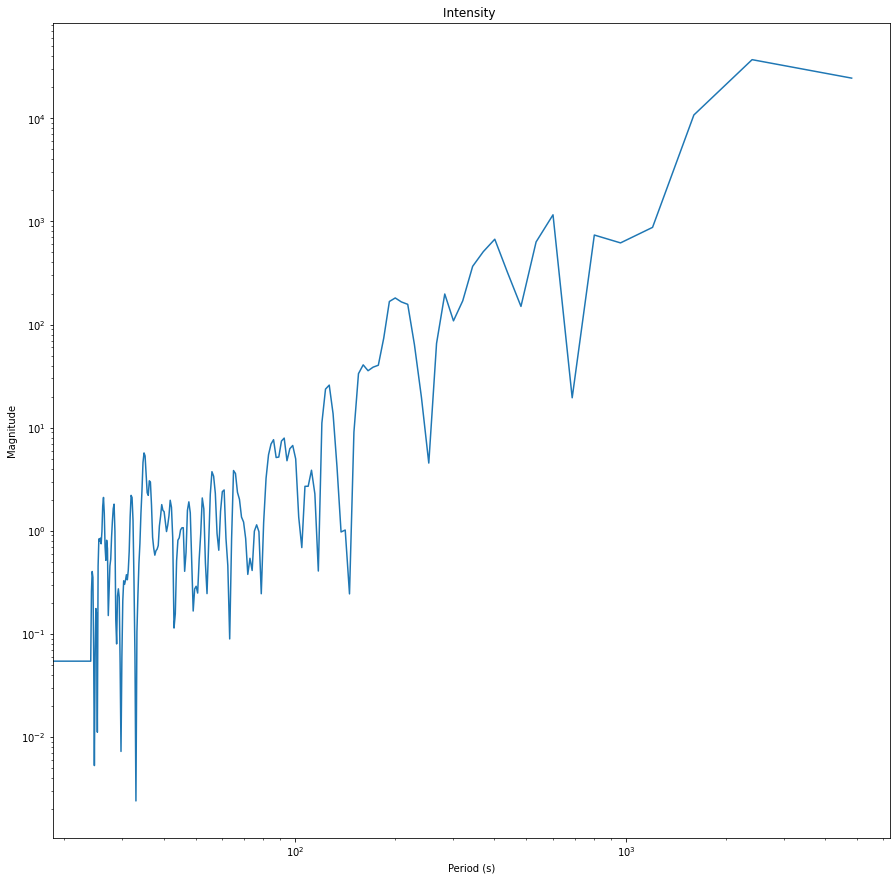

In [13]:
plt.figure(figsize = (15,15))
intensity_171_window = window*intensity_171_cal

fft_result = np.fft.fft(intensity_171_window)
fft_171 = (np.abs(fft_result)**2)/np.var(intensity_171_window)
freqs = np.fft.fftfreq(len(intensity_171_window), 12)

plt.plot(1/(freqs),(fft_171))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Period (s)")
plt.ylabel("Magnitude")
plt.title("Intensity ")
plt.savefig(fname = '171PowerSpectrum.jpeg',format="jpeg", bbox_inches="tight")

plt.show()



# slit analysis

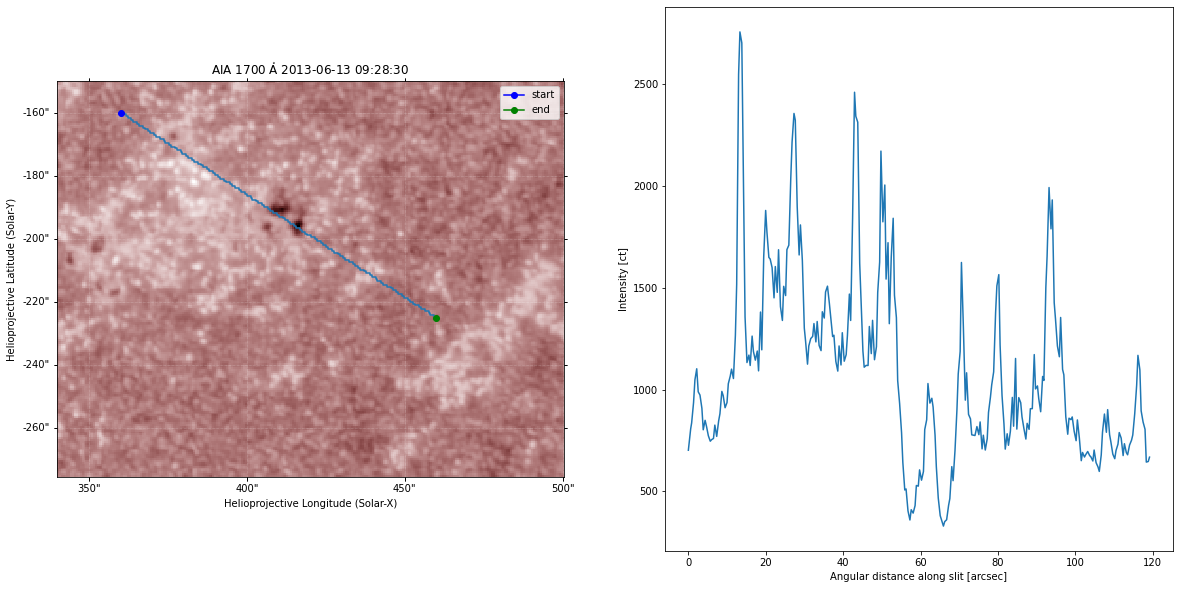

In [118]:
line_coords = SkyCoord([[360, -160], [460, -225]], unit=(u.arcsec, u.arcsec), frame=submaps_1700_prepped_rot[17].coordinate_frame)

# line_coords = SkyCoord([[360, -160], [460, -240]], unit=(u.arcsec, u.arcsec), frame=submaps_1700_prepped[17].coordinate_frame)


    # top_right = SkyCoord(500 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)  
    # 
intensity_coords = sunpy.map.pixelate_coord_path(submaps_1700_prepped_rot[17], line_coords)
intensity = sunpy.map.sample_at_coords(submaps_1700_prepped_rot[17], intensity_coords) 

angular_separation = intensity_coords.separation(intensity_coords[0]).to(u.arcsec)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection=submaps_1700_prepped_rot[17])
submaps_1700_prepped_rot[17].plot(axes=ax1)
ax1.plot_coord(intensity_coords)
ax1.plot_coord(line_coords[0], marker="o", color="blue", label="start")
ax1.plot_coord(line_coords[1], marker="o", color="green", label="end")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(angular_separation, intensity)
ax2.set_xlabel("Angular distance along slit [arcsec]")
ax2.set_ylabel(f"Intensity [{submaps_1700_prepped_rot[17].unit}]")

plt.show()


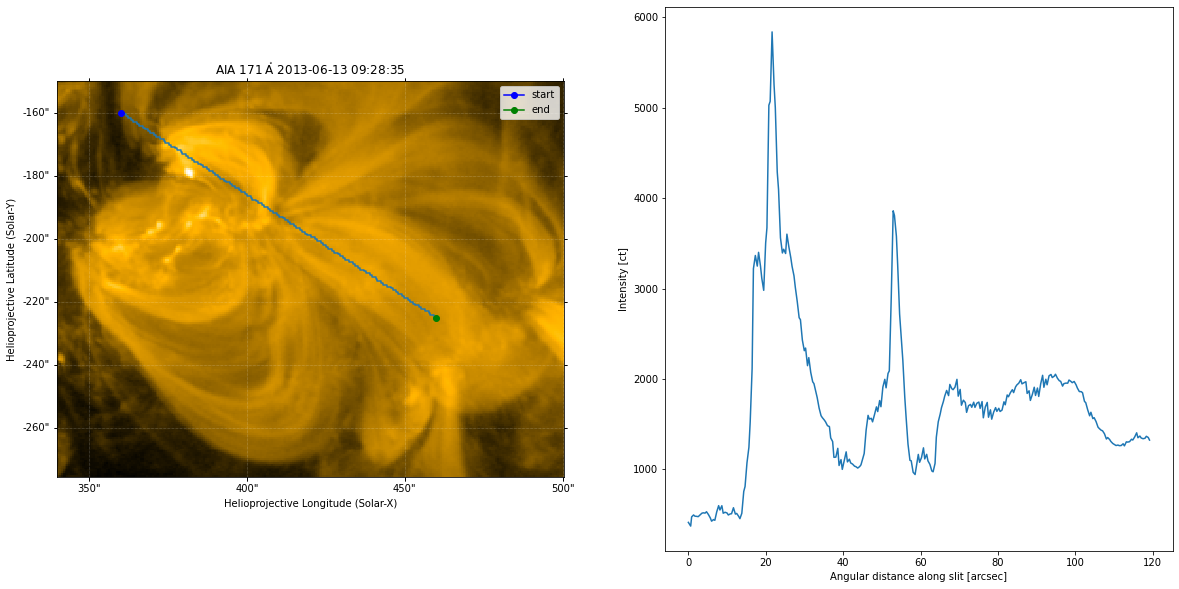

In [24]:
line_coords = SkyCoord([[360, -160], [460, -225]], unit=(u.arcsec, u.arcsec), frame=submaps_171_prepped_rot[42].coordinate_frame)

# line_coords = SkyCoord([[360, -160], [460, -240]], unit=(u.arcsec, u.arcsec), frame=submaps_1700_prepped[17].coordinate_frame)


    # top_right = SkyCoord(500 * u.arcsec, -150 * u.arcsec, frame=i.coordinate_frame)  
    # 
intensity_coords = sunpy.map.pixelate_coord_path(submaps_171_prepped_rot[42], line_coords)
intensity = sunpy.map.sample_at_coords(submaps_171_prepped_rot[42], intensity_coords) 

angular_separation = intensity_coords.separation(intensity_coords[0]).to(u.arcsec)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121, projection=submaps_171_prepped_rot[42])
submaps_171_prepped_rot[42].plot(axes=ax1)
ax1.plot_coord(intensity_coords)
ax1.plot_coord(line_coords[0], marker="o", color="blue", label="start")
ax1.plot_coord(line_coords[1], marker="o", color="green", label="end")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(angular_separation, intensity)
ax2.set_xlabel("Angular distance along slit [arcsec]")
ax2.set_ylabel(f"Intensity [{submaps_171_prepped_rot[42].unit}]")
plt.savefig(fname = '171SlitAnalysis.jpeg',format="jpeg", bbox_inches="tight")

plt.show()

In [3]:
submaps_1700_prepped_rot = Fits_to_maps('1700')
submaps_1700_prepped_rot = sorted(submaps_1700_prepped_rot,key = lambda m:m.date)

submaps_171_prepped_rot = Fits_to_maps('171')
submaps_171_prepped_rot = sorted(submaps_171_prepped_rot,key = lambda m:m.date)


# creating submap of just sun spot


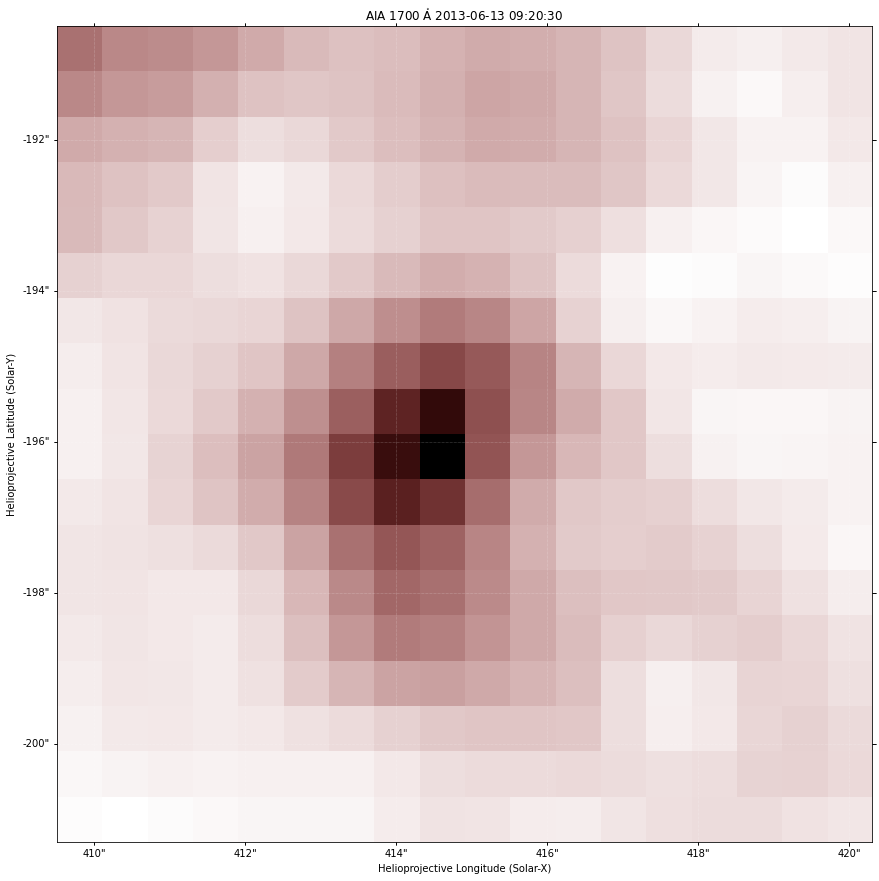

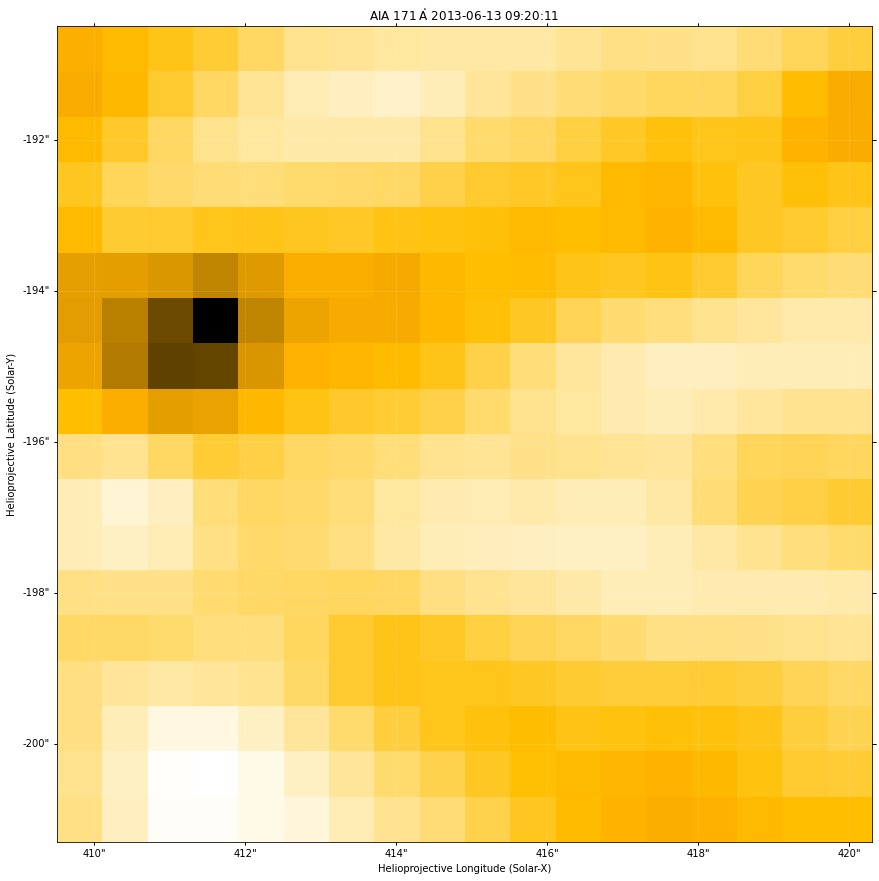

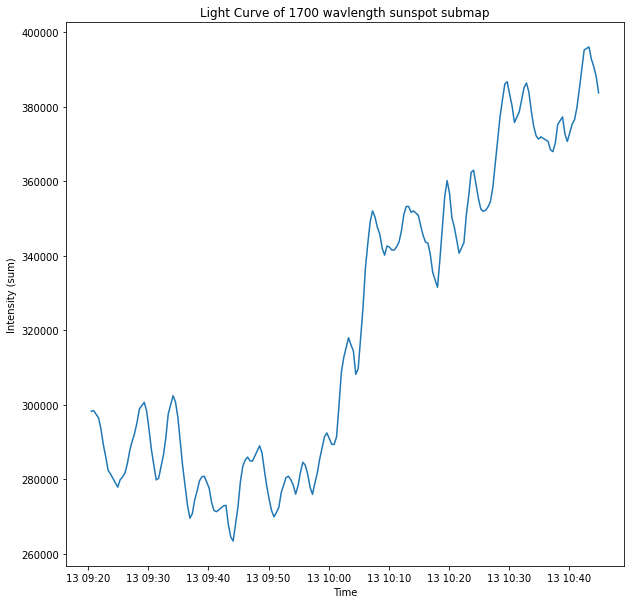

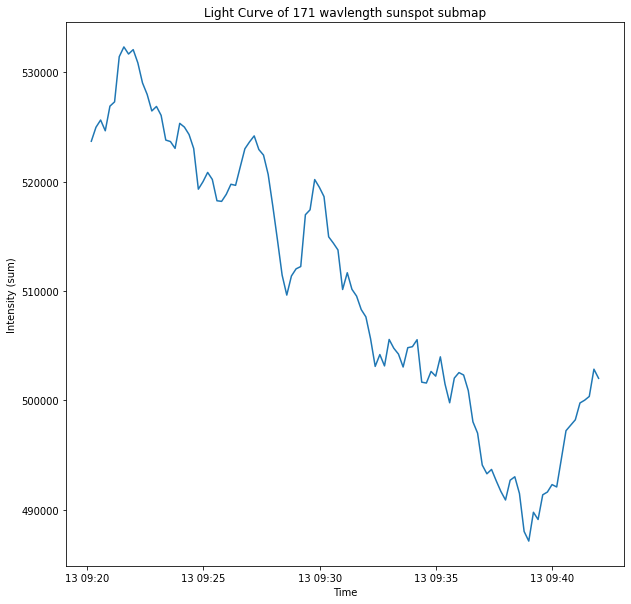

In [36]:
sunspot_submap1700 = []
for i in submaps_1700_prepped_rot:
    bottom_left = SkyCoord(410 * u.arcsec, -191 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(420 * u.arcsec, -201 * u.arcsec, frame=i.coordinate_frame)   
    submaps_1700 = i.submap(bottom_left=bottom_left, top_right=top_right)
    sunspot_submap1700.append(submaps_1700)

sunspot_submap171 = []
for i in submaps_171_prepped_rot:
    bottom_left = SkyCoord(410 * u.arcsec, -191 * u.arcsec, frame=i.coordinate_frame)
    top_right = SkyCoord(420 * u.arcsec, -201 * u.arcsec, frame=i.coordinate_frame)     
    submaps_171 = i.submap(bottom_left=bottom_left, top_right=top_right)
    sunspot_submap171.append(submaps_171)


plt.figure(figsize = (15,15))
sunspot_submap1700[0].plot(cmap = 'sdoaia1700')
plt.show()

plt.figure(figsize = (15,15))
sunspot_submap171[0].plot(cmap = 'sdoaia171')
plt.show()

# ---------------Intensities-----------------


intensity_sunspot1700= []
intensity_sunspot171 = []

# summing intenisty of every pixel in the 171 images to see how the intensity changes during time interval
for map_1700,map_171 in zip(sunspot_submap1700,sunspot_submap171):
    intensity_sum_1700 = map_1700.data.sum()
    # intensity_sum_171 = map_171.data.sum()
    intensity_sunspot1700.append(intensity_sum_1700)
    # intensity_sunspot171.append(intensity_sum_171)

for map_171 in sunspot_submap171:
    intensity_sum_171 = map_171.data.sum()

    intensity_sunspot171.append(intensity_sum_171)

# creating time axes of submaps
time_axis_1700 = [map.date.datetime for map in sunspot_submap1700]
time_axis_171 = [map.date.datetime for map in sunspot_submap171]


plt.figure(figsize=(10,10))
plt.plot(time_axis_1700, intensity_sunspot1700)
plt.xlabel("Time")
plt.ylabel("Intensity (sum)")
plt.title("Light Curve of 1700 wavlength sunspot submap")
plt.show()


plt.figure(figsize=(10,10))
plt.plot(time_axis_171[0:110], intensity_sunspot171[0:110])
# plt.xlim(15980,15985)
plt.xlabel("Time")
plt.ylabel("Intensity (sum)")
plt.title("Light Curve of 171 wavlength sunspot submap")
plt.show()

/var/folders/96/6cy2m0cs6f58g_nf35j6n89c0000gn/T/ipykernel_2597/3238212413.py:10: RuntimeWarning: divide by zero encountered in divide
  period_x_1700 = 1/freqs_1700


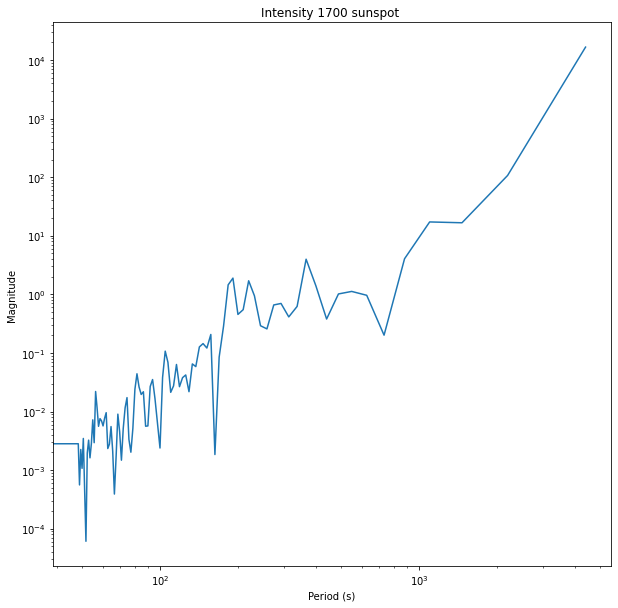

/var/folders/96/6cy2m0cs6f58g_nf35j6n89c0000gn/T/ipykernel_2597/3238212413.py:30: RuntimeWarning: divide by zero encountered in divide
  period_x_171 = 1/freqs_171


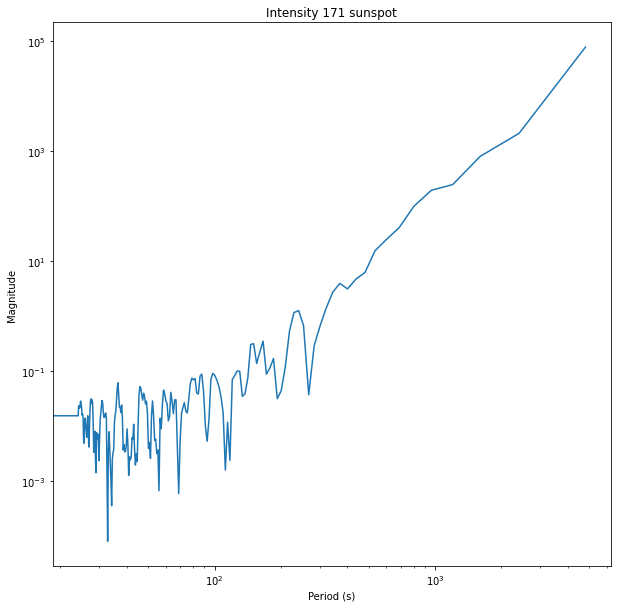

In [8]:
window_171 = signal.windows.hann(len(intensity_sunspot171))
window_1700 = signal.windows.hann(len(intensity_sunspot1700))

plt.figure(figsize = (10,10))
sunspot1700_window = window_1700*intensity_sunspot1700

fft_result_1700 = np.fft.fft(sunspot1700_window)
fft_sunspot_1700 = (np.abs(fft_result_1700)**2)/np.var(sunspot1700_window )
freqs_1700 = np.fft.fftfreq(len(sunspot1700_window ), 24)
period_x_1700 = 1/freqs_1700

plt.plot(period_x_1700,(fft_sunspot_1700))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Period (s)")
plt.ylabel("Magnitude")
plt.title("Intensity 1700 sunspot ")
# plt.savefig(fname = '171PowerSpectrum.jpeg',format="jpeg", bbox_inches="tight")

plt.show()

# -------------------------------------

plt.figure(figsize = (10,10))
sunspot171_window = window_171*intensity_sunspot171

fft_result_171 = np.fft.fft(sunspot171_window)
fft_sunspot_171 = (np.abs(fft_result_171)**2)/np.var(sunspot171_window)
freqs_171 = np.fft.fftfreq(len(sunspot171_window ), 12)
period_x_171 = 1/freqs_171

plt.plot(period_x_171,(fft_sunspot_171))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Period (s)")
plt.ylabel("Magnitude")
plt.title("Intensity 171 sunspot")
# plt.savefig(fname = '171PowerSpectrum.jpeg',format="jpeg", bbox_inches="tight")

plt.show()

In [9]:
target_3min = 180
target_5min = 300

index_1700_3min= (np.abs(period_x_1700 - target_3min)).argmin()
y_target_1700_3min = fft_sunspot_1700[index_1700_3min]

index_171_3min = (np.abs(period_x_171 - target_3min)).argmin()
y_target_171_3min = fft_sunspot_171[index_171_3min]


index_1700_5min= (np.abs(period_x_1700 - target_5min)).argmin()
y_target_1700_5min = fft_sunspot_1700[index_1700_5min]

index_171_5min = (np.abs(period_x_171 - target_5min)).argmin()
y_target_171_5min = fft_sunspot_171[index_171_5min]


print('the value on the y axis at the 3min period for the 1700 waveband is:',y_target_1700_3min,'the 171 waveband is',y_target_171_3min)
print('the value on the y axis at the 5min period for the 1700 waveband is:',y_target_1700_5min,'the 171 waveband is',y_target_171_5min)


the value on the y axis at the 3min period for the 1700 waveband is: 1.4518381348906764 the 171 waveband is 0.11505705875484372
the value on the y axis at the 5min period for the 1700 waveband is: 0.6988265269974211 the 171 waveband is 0.6620642692893361
